# PART 1 : Data Set 

### Extracting 20+ year's of daily stock prices of **AAPL** company from the alpha vantage API and storing them in a csv file 

**dataset.csv**

In [6]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time 
import matplotlib.pyplot as plt
from scipy import stats 
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import r2_score
import plotly.graph_objects as go 
from plotly.graph_objs import *
from datetime import datetime

api_key = "MNNSPRF08WG4DTL3"

C:\Users\samee\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

Using TensorFlow backend.
C:\Users\samee\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

C:\Users\samee\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

C:\Users\samee\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning:

Passing (type, 1) or '1type' as

In [ ]:
# api_key = "MNNSPRF08WG4DTL3"

ts = TimeSeries(key = api_key,output_format = 'pandas')
data,meta_data = ts.get_daily(symbol = 'AAPL',outputsize = 'full')

data.to_csv('dataset.csv')


# PART 2 : Normalization of Data 

### The database normalization is nothing but organizing tables and columns of table in such way that to reduce data  redundancy and complexity of data to improve data integrity. Data normalization is important due to following reasons: 

- To eliminate useless data 
- To reduce complexity of data
- To ensure relationship between tables and data in tables.
- To ensure data dependencies and data is logically stored.

C:\Users\samee\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\samee\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\samee\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0.5,1,'Normalized Data')

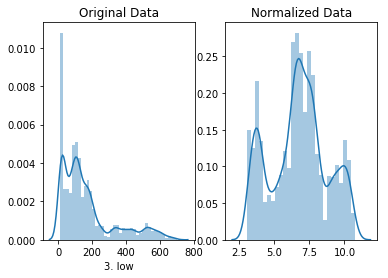

In [7]:
df = pd.read_csv('dataset.csv')


mean = df['3. low'].mean()
df = df.replace({'3. low':{0:mean}})
normalized_data = stats.boxcox(df['3. low'])

fig, ax = plt.subplots(1,2)
sns.distplot(df['3. low'], ax = ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax = ax[1])
ax[1].set_title("Normalized Data")


# PART 3: Graph Visualization 

# 1. Candle Stick Plot

### The candlestick chart is a style of financial chart describing open, high, low and close for a given x coordinate(most likely time).

### Benefits : 
-  Clear view of the entire data set
-  Can zoom onto any month and clearly see the rising and falling stocks
-  Clearly shows when the company had its downfall and success

In [8]:
df = pd.read_csv("dataset.csv")

layout = {
  "plot_bgcolor": "rgb(0,0,0)",
  "title_text" : "Candle Stick"
}

fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['1. open'],
                high=df['2. high'],
                low=df['3. low'],
                close=df['4. close'],
                increasing_line_color= 'green', decreasing_line_color= 'red' # can be cyan and gray too !!
                )], layout = layout)

fig.show()


# 2. Time Series Plot

### This plot has the following advantages : 
- It provides a clear picture of when the high and low prices have differed
- We can get to know how much profit has been earned by a company by just calculating the difference from the graph


In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = df['date'],
    y = df['2. high'],
    name = "AAPL HIGH",
    line_color = "cyan"))

fig.add_trace(go.Scatter(
    x = df['date'],
    y = df['3. low'],
    name = "AAPL LOW",
    line_color = "gray"))

fig.update_layout(title_text = "Time Series", plot_bgcolor = "rgb(0,0,0)", xaxis_rangeslider_visible = True)
fig.show()

# 3. OHLC financial Chart

In [10]:
layout = {
  "plot_bgcolor": "rgb(0,0,0)",
  "title_text" : "OHLC chart"
}

fig = go.Figure(data=[go.Ohlc(x=df['date'],
                open=df['1. open'],
                high=df['2. high'],
                low=df['3. low'],
                close=df['4. close'],
                increasing_line_color= 'cyan', decreasing_line_color= 'gray' # can be red and green too !!
                )], layout = layout)

fig.show()

# PART 4 : Hypothesis Testing
# NULL HYPOTHESIS HO : THE DIFFERNCE BETWEEN THE MEANS IS ZERO
# ALTERNATIVE HYPOTHESIS H1: THE DIFFERNCE BETWEEN THE MEANS IS NOT ZERO


In [11]:
df[['1. open','4. close']].describe()
ttest,pval = stats.ttest_rel(df['1. open'], df['4. close'])# finding the p value using t test 
print(pval)
if pval<0.05:# p is less than 0.05 (assume alpha to be 0.05)
    print("reject null hypothesis")
else:
    print("failed to reject null hypothesis")

0.302029287806968
failed to reject null hypothesis


# PART 5 : Machine Learning

* Algorithm Used : **LSTM**

In [12]:
df.columns

Index(['date', '1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [13]:
data = df.sort_index(ascending=True, axis = 0)
print(data.head())
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['date'][i]
    new_data['Close'][i] = data['4. close'][i]

         date  1. open  2. high  3. low  4. close   5. volume
0  2019-11-15   263.68   265.77  263.01    265.76  24388894.0
1  2019-11-14   263.75   264.88  262.10    262.64  22295700.0
2  2019-11-13   261.13   264.78  261.07    264.47  25683600.0
3  2019-11-12   261.55   262.79  260.92    261.96  21847200.0
4  2019-11-11   258.30   262.47  258.28    262.20  20455300.0


In [14]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [15]:
dataset = new_data.values
dataset.shape

(5033, 1)

In [16]:
#spliting the dataset
train = dataset[0:int((dataset.shape[0]/2)),:]
test = dataset[int((dataset.shape[0]/2)):,:]
print(train.shape)
test.shape

(2516, 1)


(2517, 1)

In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
print(len(scaled_data))

5033


C:\Users\samee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype object was converted to float64 by MinMaxScaler.



In [18]:
x=[]
x.append(scaled_data[0:60,0])

In [19]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [20]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')


In [21]:
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 330s - loss: 0.0022


In [22]:
inputs = new_data[len(new_data) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [23]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test.shape


(2517, 60)

In [24]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test) # PREDICTING 
closing_price = scaler.inverse_transform(closing_price)
# Results
rms=np.sqrt(np.mean(np.power((test-closing_price),2)))
print(rms)

8.612706656574808


In [27]:
#plotting
train = new_data[:int((dataset.shape[0]/2))]
test = new_data[int((dataset.shape[0]/2)):]
test['Predictions'] = closing_price
# plt.plot(train['Close'])
# plt.plot(test[['Close','Predictions']])
# plt.show()
print(test.head())

             Close  Predictions
Date                           
2009-11-17     207   213.792068
2009-11-16  206.63   214.725906
2009-11-13  204.45   215.622025
2009-11-12  201.99   215.998306
2009-11-11  203.25   215.691345


C:\Users\samee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = test.index,
    y = test['Close'],
    name = "CLOSE",
    line_color = "cyan"
))

fig.add_trace(go.Scatter(
    x = test.index,
    y = test['Predictions'],
    name = "PREDICTED",
    line_color = "gray"
))

fig.update_layout(plot_bgcolor = "rgb(0,0,0)", xaxis_rangeslider_visible = True)
fig.show()
